In [1]:
%matplotlib inline
%load_ext autotime
%load_ext snakeviz
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import datetime as dt
from SIR_models import *
import datetime as dt

# Modelling the COVID spread with a SIR model


$$\frac{dS}{dt} = -\beta IS$$

$$\frac{dI}{dt} = \beta IS-\gamma I$$

$$\frac{dR}{dt} = \gamma I$$

Beta:0.26824145855983644 Gamma:0.01304273316407611
R0:20.566353323754246
Predicting with Beta:0.26824145855983644 Beta2: 0.26824145855983644 Gamma:0.01304273316407611


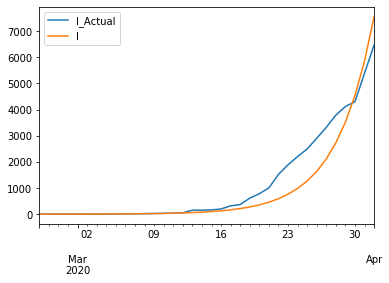

time: 609 ms


In [2]:
#%%snakeviz ## BETA3
trained = SIR('Brazil', N=200e6,alpha=0.7)
#out = jap.train()
#jap.estimate()
out = trained.train()
#out = Trained.predict(beta=0.20,gamma=0.07)
trained.I_fit_plot()

Beta:0.3444472364966636 Beta2: 0.15309285675478698 Gamma:1e-08
R0:34444723.64966636
Predicting with Beta:0.3444472364966636 Beta2: 0.15309285675478698 Gamma:1e-08


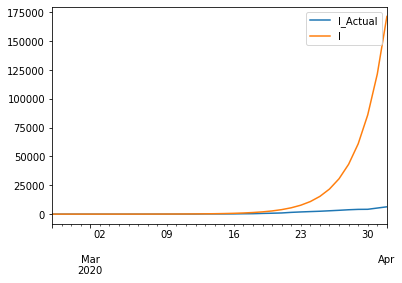

time: 964 ms


In [3]:
#%%snakeviz ## BETA3
#custom = SIR.Learner('Brazil', N=200e6,alpha=0.7,forcedBeta=0.3)
#custom = SIR.Learner('Brazil', N=200e6,alpha=0.7,forcedGamma=0.07)
#custom = SIR.Learner('Brazil', N=200e6,alpha=0.7,forcedBeta = 0.20,forcedGamma=0.07, daysPredict = 30,nth=1)
custom = SIR('Brazil', N=200e6, alpha=0.7, forcedGamma=0.07, daysPredict=30, 
                     nth=1, estimateBeta2=True, quarantineDate=dt.datetime(2020,3,15))
custom = SIR('Brazil', N=200e6, alpha=0.7, daysPredict=30, 
                     nth=1, estimateBeta2=True, recoveredAssumption = 2, quarantineDate=dt.datetime(2020,3,15))

#out = jap.train()
#jap.estimate()
out = custom.train()
#out = custom.predict(beta=0.20,gamma=0.07)
#out = custom.predict(beta=0.20,gamma=None)
custom.I_fit_plot()

In [4]:
0.16/0.01

16.0

time: 2 ms


In [5]:
nonl = custom.df
nonl

,I_Actual,R_Actual,S,I,R
2020-02-26,1.0,0.0,2.000000e+08,1.000000e+00,0.000000e+00
2020-02-27,1.0,0.0,2.000000e+08,1.411211e+00,1.193828e-08
2020-02-28,1.0,0.0,2.000000e+08,1.991696e+00,2.879094e-08
2020-02-29,2.0,0.0,2.000000e+08,2.810188e+00,5.255343e-08
2020-03-01,2.0,0.0,2.000000e+08,3.965140e+00,8.608403e-08
...,...,...,...,...,...
2020-08-24,NaN,NaN,1.118623e+00,1.999998e+08,2.436907e+02
2020-08-25,NaN,NaN,9.600383e-01,1.999998e+08,2.456907e+02
2020-08-26,NaN,NaN,8.236955e-01,1.999998e+08,2.476907e+02
2020-08-27,NaN,NaN,7.067631e-01,1.999997e+08,2.496907e+02


time: 18 ms


In [6]:
custom.predict_linear()
l = custom.df
l

Predicting with Beta:0.3444472364966636 Beta2: 0.15309285675478698 Gamma:1e-08


,I_Actual,R_Actual,S,I,R
2020-02-26,1.0,0.0,2.000000e+08,1.000000e+00,0.000000e+00
2020-02-27,1.0,0.0,2.000000e+08,1.344447e+00,1.000000e-08
2020-02-28,1.0,0.0,2.000000e+08,1.807538e+00,2.344447e-08
2020-02-29,2.0,0.0,2.000000e+08,2.430140e+00,4.151986e-08
2020-03-01,2.0,0.0,2.000000e+08,3.267195e+00,6.582125e-08
...,...,...,...,...,...
2020-08-24,NaN,NaN,5.230486e+00,1.999998e+08,2.108091e+02
2020-08-25,NaN,NaN,4.429737e+00,1.999998e+08,2.128091e+02
2020-08-26,NaN,NaN,3.751577e+00,1.999998e+08,2.148091e+02
2020-08-27,NaN,NaN,3.177238e+00,1.999998e+08,2.168091e+02


time: 15 ms


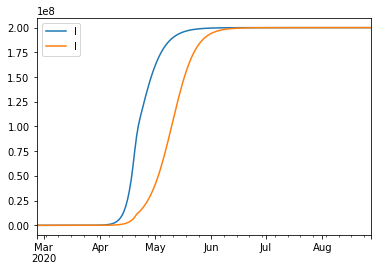

time: 222 ms


In [7]:
pd.DataFrame([nonl["I"],l["I"]]).T.plot()

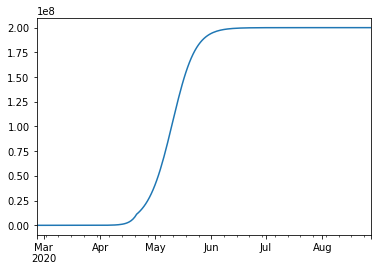

time: 193 ms


In [8]:
l["I"].plot()

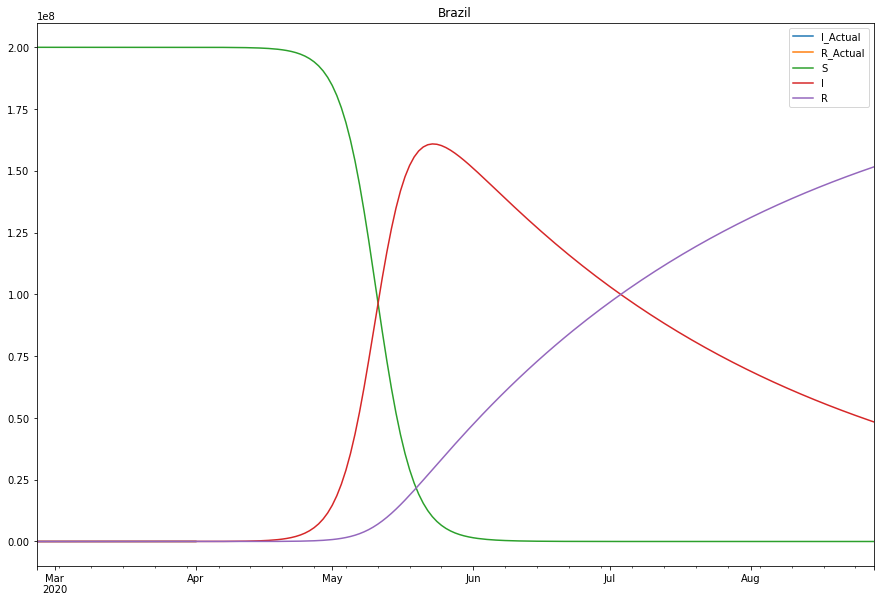

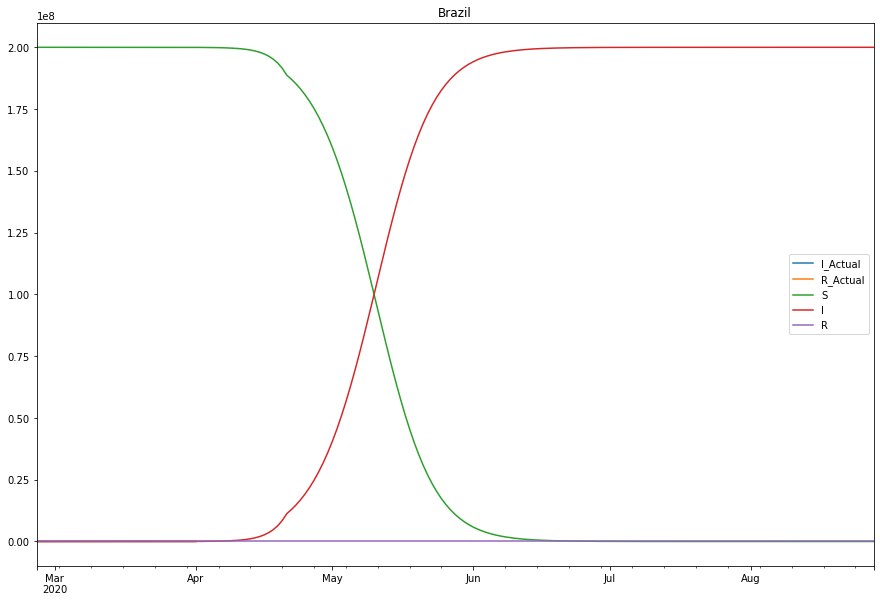

time: 553 ms


In [9]:
trained.main_plot()
custom.main_plot()

In [10]:
#(custom.df - trained.df)
custom.df

,I_Actual,R_Actual,S,I,R
2020-02-26,1.0,0.0,2.000000e+08,1.000000e+00,0.000000e+00
2020-02-27,1.0,0.0,2.000000e+08,1.344447e+00,1.000000e-08
2020-02-28,1.0,0.0,2.000000e+08,1.807538e+00,2.344447e-08
2020-02-29,2.0,0.0,2.000000e+08,2.430140e+00,4.151986e-08
2020-03-01,2.0,0.0,2.000000e+08,3.267195e+00,6.582125e-08
...,...,...,...,...,...
2020-08-24,NaN,NaN,5.230486e+00,1.999998e+08,2.108091e+02
2020-08-25,NaN,NaN,4.429737e+00,1.999998e+08,2.128091e+02
2020-08-26,NaN,NaN,3.751577e+00,1.999998e+08,2.148091e+02
2020-08-27,NaN,NaN,3.177238e+00,1.999998e+08,2.168091e+02


time: 12 ms


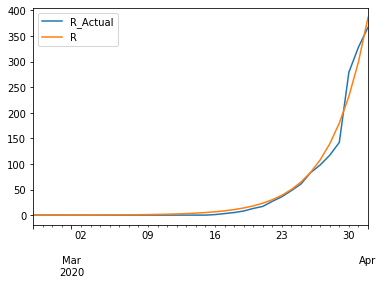

time: 221 ms


In [11]:
trained.R_fit_plot()

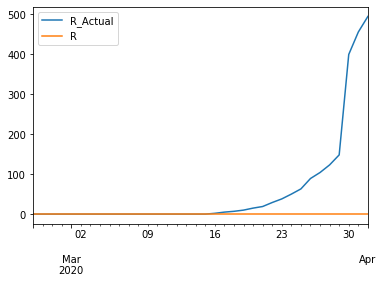

time: 202 ms


In [12]:
custom.R_fit_plot()

Perguntas:
* calibrar parametros na opt
* calibrar beta decay

* Qual o fim da quarentena? Quantos casos sao internação (15% dos confirmados). Leitos na italia (12.5 * 60e6 / 1e5)
* Lag de tempo de internação (novo tratamento caindo de 15 p/ 7)
* Contrai, x (7) dias depois interna, y(10) dias depois sai da internação
* Novos dados | tirar nth day
* fazer brasil e coreia do norte
* fazer dados simulados

Outros:
* prob de contagio usando varios paises
* momento otimo de quarentena
* time varying beta


US 45 MM influenza
https://www.cdc.gov/flu/about/burden/index.html

# Sensitivity Analysis

## Sensitivity to nth

In [13]:
t1 = SIR('Brazil', N=200e6, alpha=0.7)
t1.train()

Beta:0.26824145855983644 Gamma:0.01304273316407611
R0:20.566353323754246
Predicting with Beta:0.26824145855983644 Beta2: 0.26824145855983644 Gamma:0.01304273316407611
time: 395 ms


In [14]:
t2 = SIR('Brazil', N=200e6, alpha=0.7, nth=100)
t2.train()

Beta:0.21259851891256004 Gamma:0.010466877703397576
R0:20.31155086903805
Predicting with Beta:0.21259851891256004 Beta2: 0.21259851891256004 Gamma:0.010466877703397576
time: 356 ms


In [15]:
t2 = SIR('Brazil', N=200e6, alpha=0.7, nth=150)
t2.train()

Beta:0.21259851891256004 Gamma:0.010466877703397576
R0:20.31155086903805
Predicting with Beta:0.21259851891256004 Beta2: 0.21259851891256004 Gamma:0.010466877703397576
time: 289 ms


In [16]:
t2 = SIR('Brazil', N=200e6, alpha=0.7, nth=1000)
t2.train()

Beta:0.18540375642813173 Gamma:0.014308789206119221
R0:12.957333688921976
Predicting with Beta:0.18540375642813173 Beta2: 0.18540375642813173 Gamma:0.014308789206119221
time: 185 ms


## Sensitivity to infected assumption

In [17]:
t1 = SIR('Brazil', N=200e6, alpha=0.7, infectedAssumption=1)
t1.train()

Beta:0.26824145855983644 Gamma:0.01304273316407611
R0:20.566353323754246
Predicting with Beta:0.26824145855983644 Beta2: 0.26824145855983644 Gamma:0.01304273316407611
time: 371 ms


In [18]:
t1 = SIR('Brazil', N=200e6, alpha=0.7, infectedAssumption=2)
t1.train()

Beta:0.2641785497023327 Gamma:0.008470405224162371
R0:31.188419291764994
Predicting with Beta:0.2641785497023327 Beta2: 0.2641785497023327 Gamma:0.008470405224162371
time: 383 ms


In [19]:
t1 = SIR('Brazil', N=200e6, alpha=0.7, infectedAssumption=3)
t1.train()

Beta:0.2628557371931689 Gamma:0.006978381150102361
R0:37.66715109697229
Predicting with Beta:0.2628557371931689 Beta2: 0.2628557371931689 Gamma:0.006978381150102361
time: 462 ms


In [20]:
t1 = SIR('Brazil', N=200e6, alpha=0.7, infectedAssumption=4)
t1.train()

Beta:0.26225384204446883 Gamma:0.006291904612365689
R0:41.681153514160506
Predicting with Beta:0.26225384204446883 Beta2: 0.26225384204446883 Gamma:0.006291904612365689
time: 350 ms


## Sensitivity to population

In [21]:
t1 = SIR('Brazil', N=200e6, alpha=0.7,)
t1.train()

Beta:0.26824145855983644 Gamma:0.01304273316407611
R0:20.566353323754246
Predicting with Beta:0.26824145855983644 Beta2: 0.26824145855983644 Gamma:0.01304273316407611
time: 380 ms


In [22]:
t1 = SIR('Brazil', N=150e6, alpha=0.7,)
t1.train()

Beta:0.26945146737579573 Gamma:0.014416507310891334
R0:18.69048179042863
Predicting with Beta:0.26945146737579573 Beta2: 0.26945146737579573 Gamma:0.014416507310891334
time: 306 ms


In [23]:
t1 = SIR('Brazil', N=100e6, alpha=0.7,)
t1.train()

Beta:0.2702834915153625 Gamma:0.015285060114061966
R0:17.682854336091673
Predicting with Beta:0.2702834915153625 Beta2: 0.2702834915153625 Gamma:0.015285060114061966
time: 421 ms


In [24]:
t1 = SIR('Brazil', N=50e6, alpha=0.7,)
t1.train()

Beta:0.2682441774120608 Gamma:0.013042280216963128
R0:20.567276039904087
Predicting with Beta:0.2682441774120608 Beta2: 0.2682441774120608 Gamma:0.013042280216963128
time: 395 ms


# SEIR Comparison

Beta:0.26824145855983644 Gamma:0.01304273316407611
R0:20.566353323754246
Predicting with Beta:0.26824145855983644 Beta2: 0.26824145855983644 Gamma:0.01304273316407611


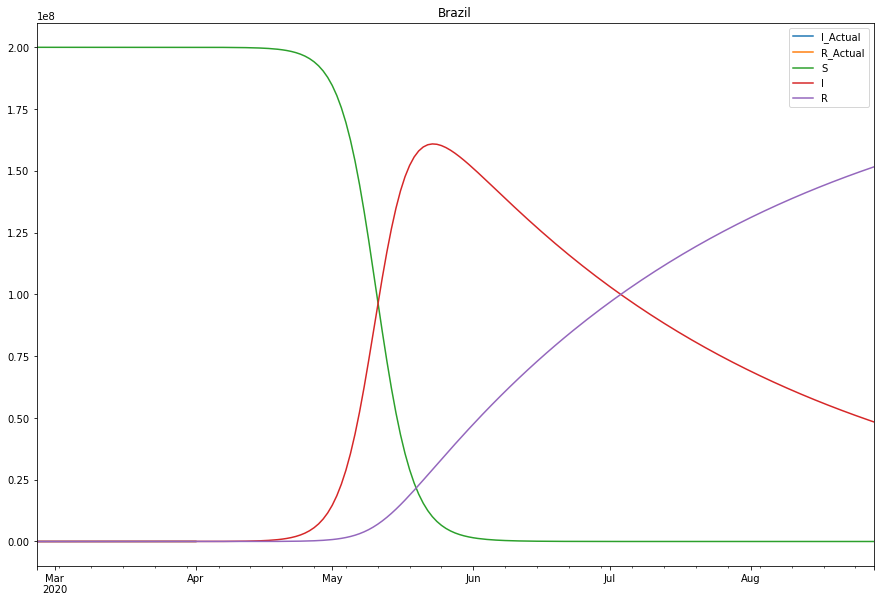

time: 665 ms


In [25]:
seir = SIR('Brazil', N=200e6, alpha=0.7)
seir.train()
seir.main_plot()

Beta:0.4394408166465354 Gamma:0.07 Sigma:0.2013735252041161
R0:6.277725952093363
Predicting with Beta:0.4394408166465354 Beta2: 0.4394408166465354 Gamma:0.07 Sigma:0.2013735252041161


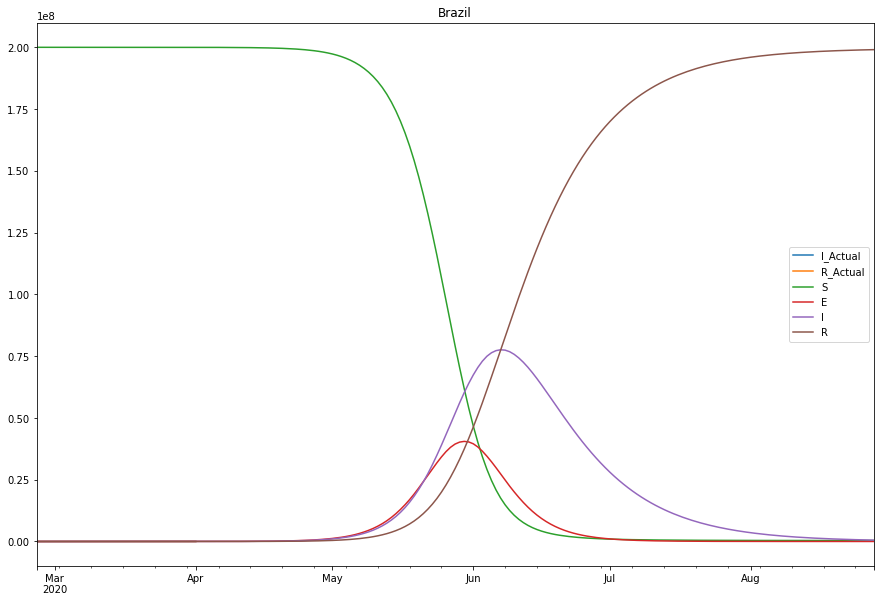

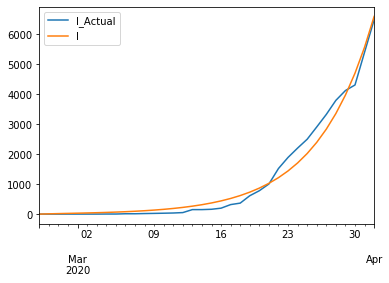

time: 1.4 s


In [26]:
seir = LearnerSEIR('Brazil', N=200e6, alpha=0.7, elag=15, forcedGamma = 0.07)
seir.train()
seir.main_plot()
seir.I_fit_plot()

## Constrained optimization - SIR

Beta:0.30456119512928 Gamma:0.05
R0:6.091223902585599
Predicting with Beta:0.30456119512928 Beta2: 0.30456119512928 Gamma:0.05


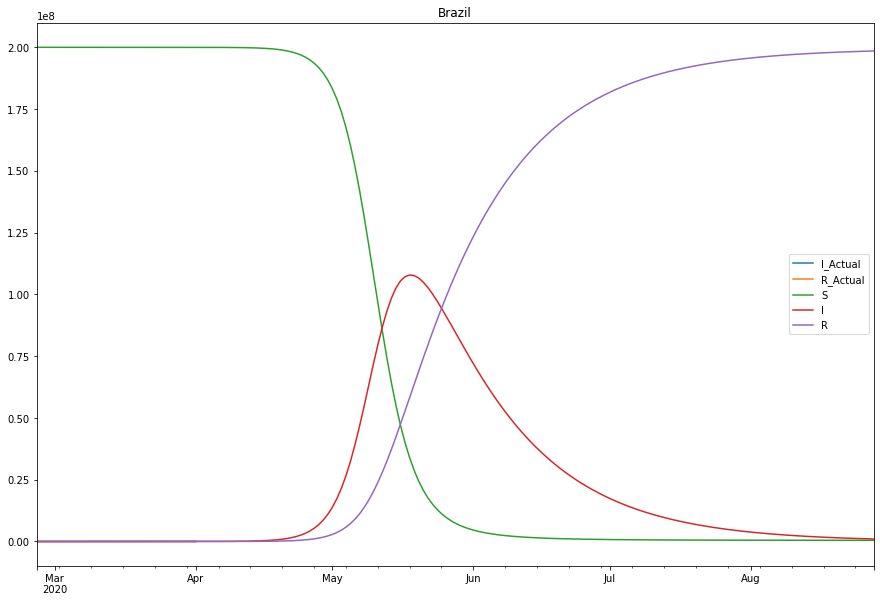

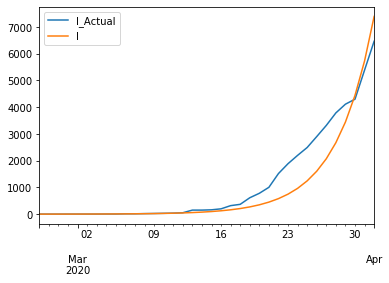

time: 1.02 s


In [28]:
t1 = SIR('Brazil', 
                 N=200e6, 
                 alpha=0.7,
                 betaBounds = (0.1, 0.4),
                 gammaBounds = (0.05, 0.1),
                )
t1.train()
t1.main_plot()
t1.I_fit_plot()

## Constrained optimization - SIR

* Tentar colocar os confirmados uma parte no incubados
* tentar falar que 1/3 dos confirmados tao incubados (ou alguma premissa) - talvez nao pq aqui mal estao testando
* calibrar o período de incubação

WHO:
>The “incubation period” means the time between catching the virus and beginning to have symptoms of the disease. Most estimates of the incubation period for COVID-19 range from 1-14 days, most commonly around five days. These estimates will be updated as more data become available. So from 5 to 7.Or 6 if 5 is common. (Inverse of sigma)





In [64]:
class pai():
    def __init__(self,a='a',b='b',c='c'):
        self.a = a
        self.b = b
        self.c = c
        
        
class filho(pai):
    def __init__(self,d, **kw):
        super().__init__(**kw)
        self.d = d

time: 1.03 ms


In [65]:
f = filho(d=10, a=1, b=2, c=3)
f.a

1

time: 3 ms


In [67]:
pd.Series([1,2,4]).loc[:1]

0    1
1    2
dtype: int64

time: 1.96 ms
